<a href="https://colab.research.google.com/github/HendersonAR/Student-Performance---Bayesian/blob/shillis17-EDA1/eda/newData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [41]:
file_path = 'student-scores.csv'
df = pd.read_csv(file_path)

df['part_time_job'] = df['part_time_job'].astype(int)
df['extracurricular_activities'] = df['extracurricular_activities'].astype(int)
df['gender'] = df['gender'].replace({'male': 1, 'female': 0})
df['career_aspiration'] = df['career_aspiration'].astype('category')
df['average_score'] = round((df['math_score'] + df['history_score'] +
                       df['physics_score'] + df['chemistry_score'] +
                       df['biology_score'] + df['english_score'] +
                       df['geography_score'])/7,2)
print(df.head())

   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com       1   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com       0   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com       0   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com       0   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com       1   

   part_time_job  absence_days  extracurricular_activities  \
0              0             3                           0   
1              0             2                           0   
2              0             9                           1   
3              0             5                           0   
4              0             5                           0   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

C:\Users\shill\AppData\Local\Temp\ipykernel_35292\1396673541.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'male': 1, 'female': 0})


In [42]:
file_path = 'student-scores-clean.csv'
df = df.drop(['id','career_aspiration','first_name','last_name','email','career_aspiration',
              'math_score','history_score','history_score','chemistry_score','biology_score',
              'english_score','geography_score'],axis = 1)
df.to_csv(file_path, index=False)

In [43]:
df.describe()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,physics_score,average_score
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.499000,0.158000,3.665500,0.20400,17.755500,81.336500,80.980315
std,0.500124,0.364832,2.629271,0.40307,12.129604,12.539453,6.042297
min,0.000000,0.000000,0.000000,0.00000,0.000000,50.000000,59.140000
25%,0.000000,0.000000,2.000000,0.00000,5.000000,71.000000,77.290000
50%,0.000000,0.000000,3.000000,0.00000,18.000000,83.000000,81.000000
75%,1.000000,0.000000,5.000000,0.00000,28.000000,92.000000,84.710000
max,1.000000,1.000000,10.000000,1.00000,50.000000,100.000000,96.140000


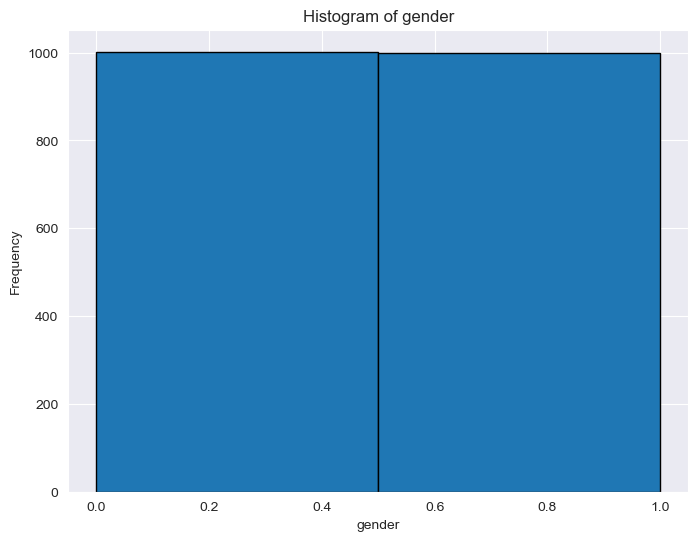

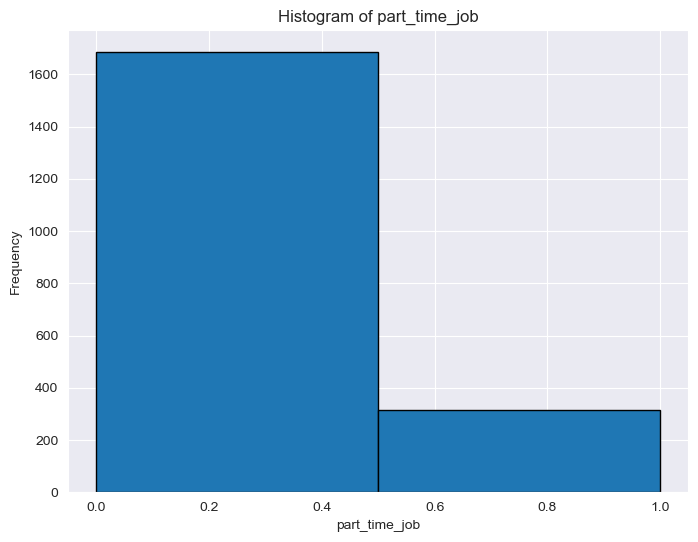

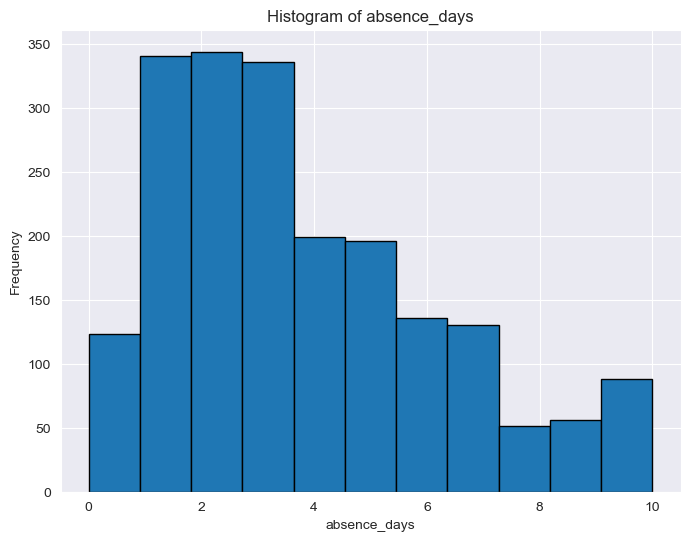

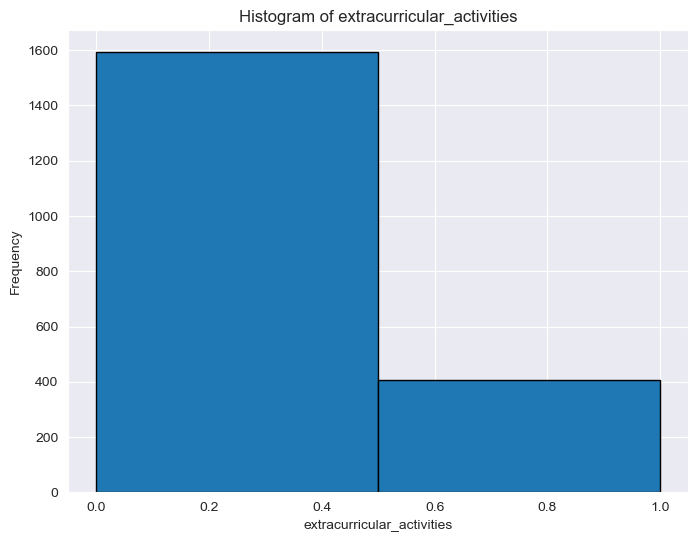

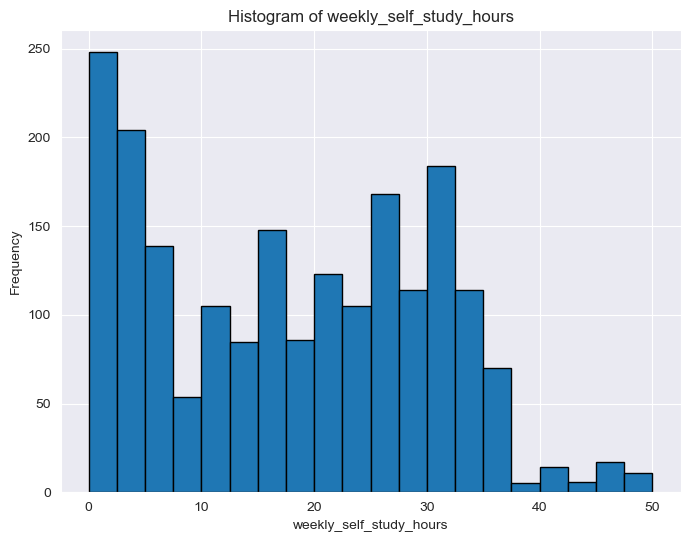

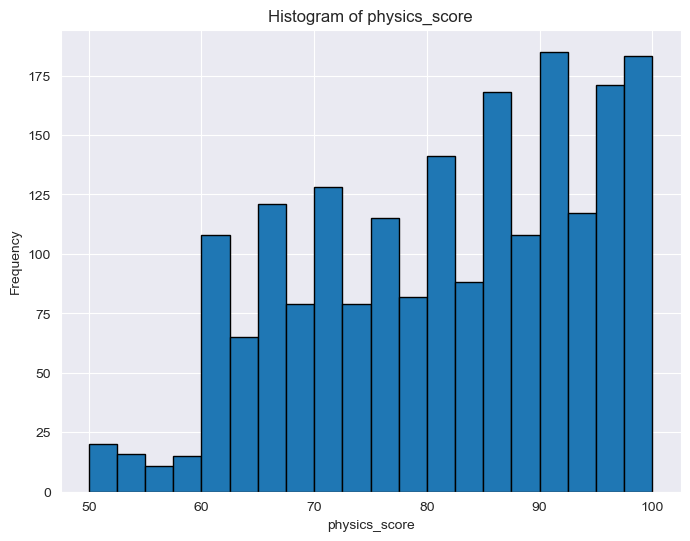

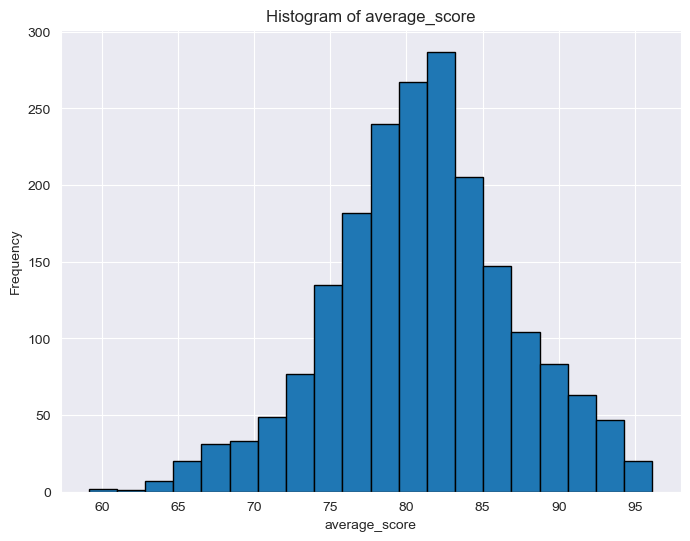

In [44]:
for column in df.columns:
  unique_vals = df[column].unique()
  num_bins = len(unique_vals) if len(unique_vals) < 20 else 20
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=num_bins, edgecolor='black')
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.savefig(f'img/{column}_historgram.png')
  plt.show()